In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('train.csv')
# ProfileReport(df,
#               correlations = {
#                   'pearson':{
#                       'calculate':True
#                       }
#               }
#               ).to_file('sum.html')

In [3]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [4]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [5]:
df['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

This indicates more currence of Ford vehicles in the dataset

In [6]:
current_year = 2024

df['age'] = current_year - df['model_year']

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
brand_enc = le.fit(df['brand'])
df['brand_enc'] = brand_enc.transform(df['brand'])

df[['brand', 'brand_enc']].sample(7)

,brand,brand_enc
13021,Land,26
145495,Hyundai,19
66964,Chevrolet,9
165705,Land,26
149634,Lexus,27
40948,Chevrolet,9
12303,Lexus,27


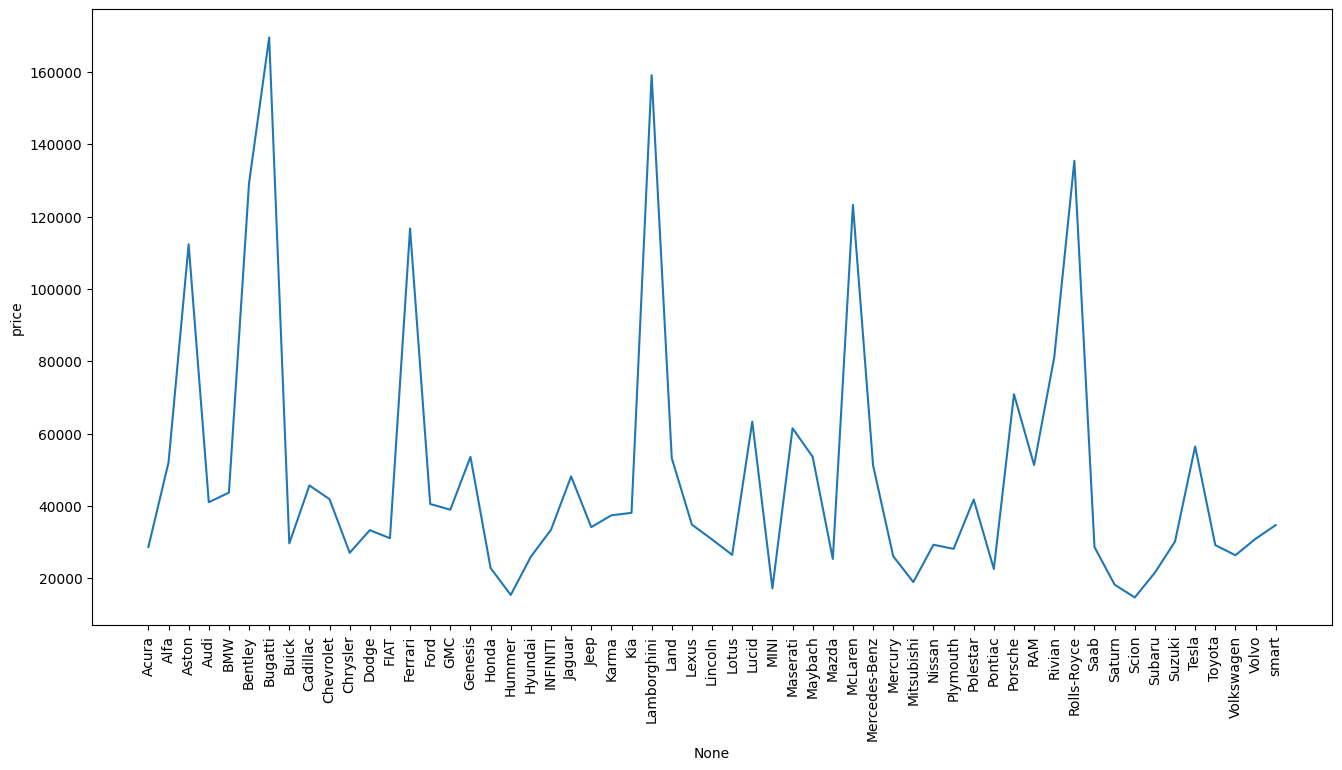

In [165]:
data = df[['brand', 'price']].groupby('brand').agg({'price':'mean', 'brand':'count'})
data.index.name = None

%matplotlib inline
plt.figure(figsize=(16, 8))
sns.lineplot(data, x=data.index, y='price')
plt.xticks(data.index, rotation = 90)
plt.show()

This indicates varying resale price for different model of cars, bugatti having the higest 

In [166]:
data.head()

,price,brand
Acura,28628.496494,2282
Alfa,51993.095308,682
Aston,112364.588235,238
Audi,41004.856985,10887
BMW,43659.775487,17028


In [167]:
# data.set_index('brand', inplace=True)
data.drop('brand', axis=1, inplace=True)
data.head()

,price
Acura,28628.496494
Alfa,51993.095308
Aston,112364.588235
Audi,41004.856985
BMW,43659.775487


In [13]:
luxury_brands =  ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land','Lexus', 'Jaguar', 'Bentley', 'Maserati','Lamborghini', 'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston','Maybach']
df['is_luxury'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

**Model year analysis**

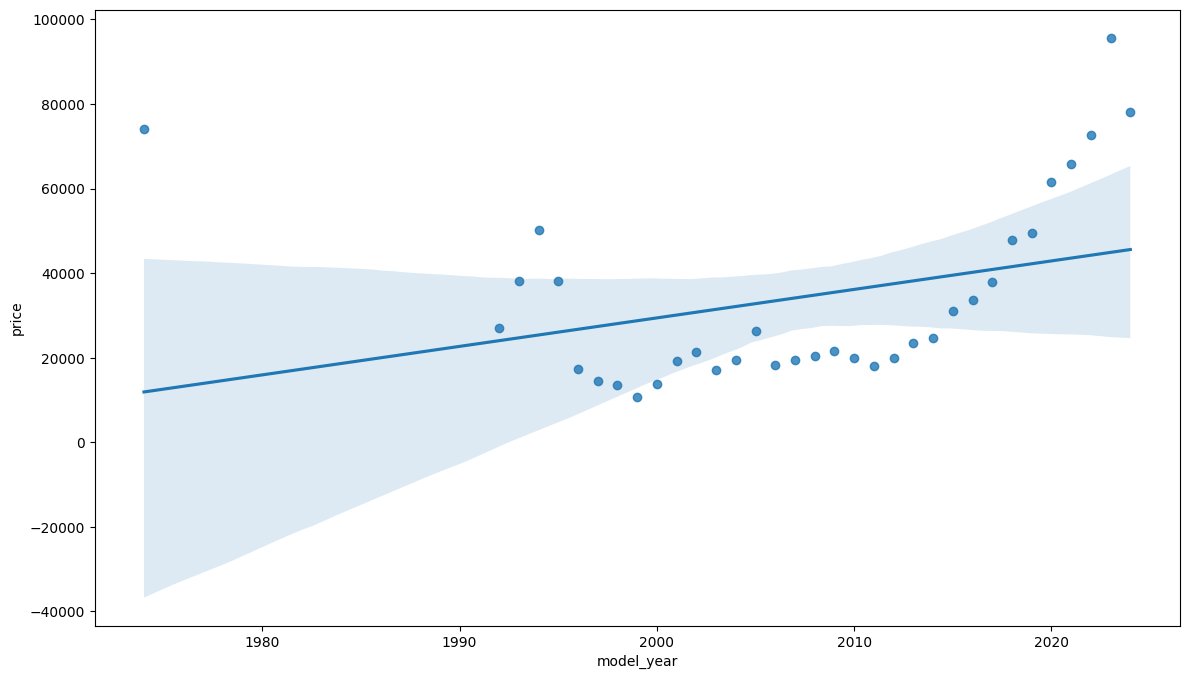

In [168]:
data = df.groupby('model_year', as_index=False)['price'].mean()
plt.figure(figsize=(14, 8))
sns.regplot(data, x='model_year', y='price')
plt.show()

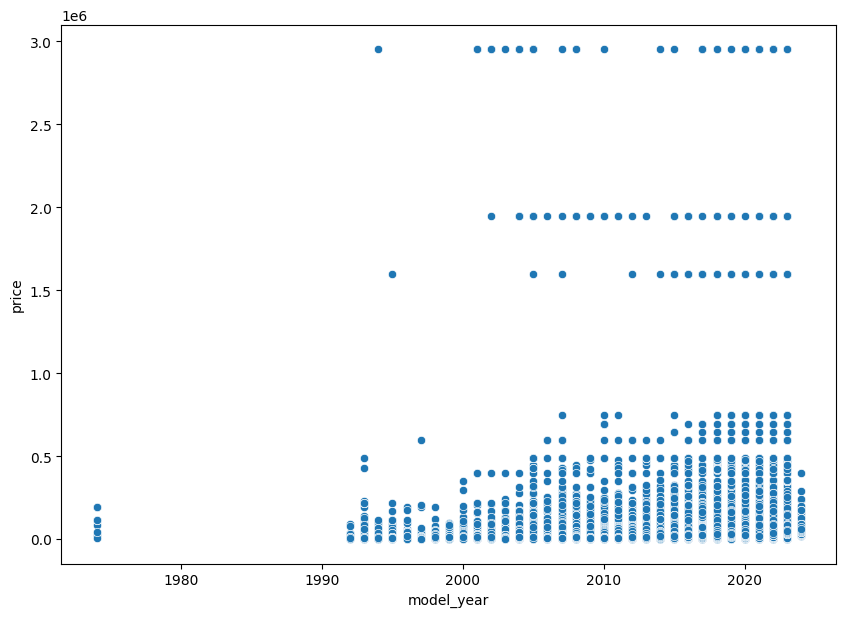

In [171]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df, x='model_year', y='price')
plt.show()

We didn't get much information from this as the relationship between model year and price varies across different brands.

<h2>Milage analysis</h2>

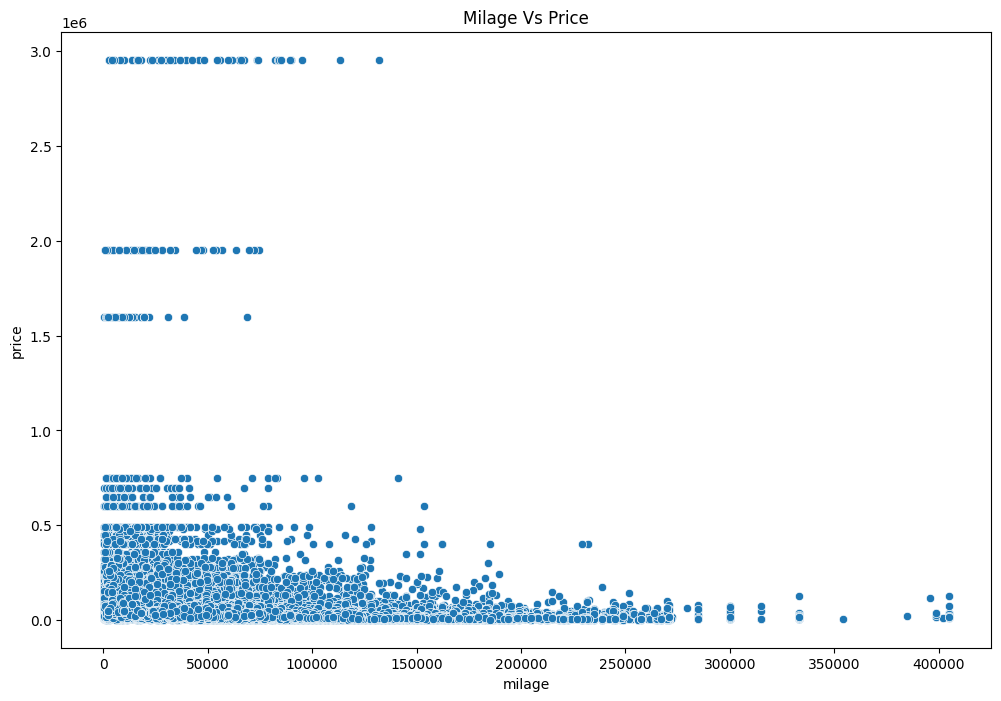

In [172]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df, x='milage', y='price')
plt.title('Milage Vs Price')
plt.show()

This shows a fairly negative correlation between milage and car price

<h2>Fuel type analysis</h2>

In [17]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [18]:
# to handle for missing data

def fill_fuel_type(engine):
    '''This function fills the missing fuel type cells with values from the engine type'''
    if pd.isnull(engine):
        return None
    engine_lower = engine.lower()
    if 'gasoline' in engine_lower:
        return 'Gasoline'    
    elif 'diesel' in engine_lower:
        return 'Diesel'
    elif 'electric' or 'motor' in engine_lower:
        return 'Electric'
    elif 'hybrid' in engine_lower:
        return 'Hybrid'
    else:
        return None

In [19]:
df['fuel_type'] = df.apply(lambda row: fill_fuel_type(row['engine']) if pd.isnull((row['fuel_type'])) or (row['fuel_type'] == '–') else row['fuel_type'], axis=1)

In [20]:
df[df['fuel_type'] == '–'].count()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
age             0
brand_enc       0
is_luxury       0
dtype: int64

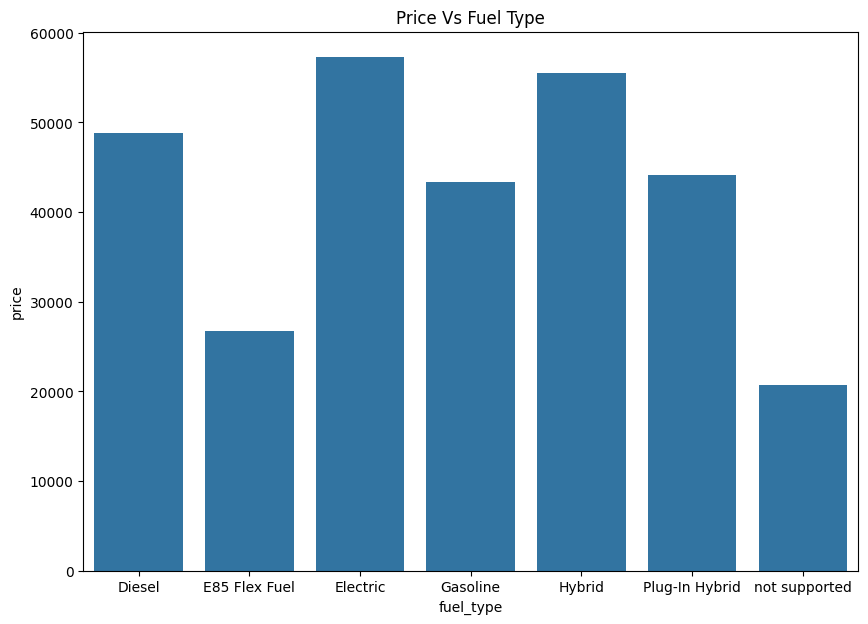

In [173]:
fuel_enc = le.fit(df['fuel_type'])
df['fuel_type_enc'] = fuel_enc.transform(df['fuel_type'])
data = df.groupby('fuel_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data, x='fuel_type', y='price')
plt.title('Price Vs Fuel Type')
plt.show()

In [22]:
'''This indicates that Electric cars have a higher resale value than other fuel types'''

'This indicates that Electric cars have a higher resale value than other fuel types'

<h2>Engine type analysis</h2>

In [23]:
def check_electric(row):
    
    if ('electric' in row['fuel_type'].lower()) or (('electric' in row['engine'].lower()) and (('hybrid' not in row['fuel_type'].lower()) or ('gasoline' not in row['engine'].lower()))):
        return 1
    else:
        return 0

In [24]:
# create a feature to distinguish electric cars
df['is_electric'] = df.apply(check_electric, axis=1)

In [25]:
df['is_electric'].value_counts()

is_electric
0    179817
1      8716
Name: count, dtype: int64

In [26]:
import re
# from engine we extract horsepower feature
def extract_hp(engine):
    if pd.isnull(engine):
        return None
    hp_match = re.search(r'(\d+\.?\d*)\s*HP', engine)
    if hp_match:
        return float(hp_match.group(1)) 
    else:
        # estimate horse power
        cyl = re.search(r'(\d+)\s*Cyl(inder)?', engine)
        V = re.search(r'V(\d+)', engine)
        size = re.search(r'(\d+\.\d+)\s*L', engine)
        siz = re.search(r'(\d+\.\d+)\s*Liter', engine)
        valv = re.search(r'(\d+)\s*V', engine)
        turbo = re.search(r'Turbo', engine)
        
        cyl = cyl if cyl else V
        size = size if size else siz
        
        if turbo:
            if cyl and size:
                return float(cyl.group(1)) * float(size.group(1)) * 20
            elif valv and size:
                return (float(valv.group(1))/4) * float(size.group(1)) * 20
            else:
                return None
        else:
            if cyl and size:
                return float(cyl.group(1)) * float(size.group(1)) * 8.5
            elif valv and size:
                return (float(valv.group(1))/4) * float(size.group(1)) * 8.5
            else:
                return None
            
            
# from engine we extract cylinders
def extract_cyl(engine):
    cyl = re.search(r'(\d+)\s*Cyl(inder)?', engine)
    valv = re.search(r'(\d\d)\s*V', engine)
    
    if cyl:
        return int(cyl.group(1)) 
    elif valv and 'electric' not in engine.lower():
        return int(valv.group(1))/4 
    else: 
        cyl = re.search(r'V(\d+)', engine)
        return int(cyl.group(1)) if cyl else None

In [27]:
df['hp'] = df['engine'].apply(extract_hp)
df['Cyl'] = df['engine'].apply(extract_cyl)

In [28]:
df[['Cyl', 'hp']].isnull().sum()

Cyl    14277
hp      9662
dtype: int64

In [94]:
# fill empty hp with mean of similar brand and model

hp_mod_mean = df.groupby(['brand', 'model'])['hp'].mean()

def fill_rest_hp_model(row):
    
    if pd.isnull(row['hp']):
        try:
            return hp_mod_mean.loc[(row['brand'], row['model'])]
        except KeyError:
            return row['hp']            
    else:
        return row['hp']
    
df['hp'] = df.apply(fill_rest_hp_model, axis=1)

# fill empty hp with mean of similar brand and year

hp_brand_mean = df.groupby('brand')['hp'].median()


def fill_rest_hp_brand(row):
    
    if pd.isnull(row['hp']):
        return hp_brand_mean.loc[row['brand']]
    else:
        return row['hp']
    
df['hp'] = df.apply(fill_rest_hp_brand, axis=1)

# fill empty cyl with mean of similar brand and model

cyl_mod_mean = df.groupby(['brand', 'model'])['Cyl'].median()

def fill_rest_cyl_model(row):
    
    if pd.isnull(row['Cyl']):
        try:
            return cyl_mod_mean.loc[(row['brand'], row['model'])]
        except KeyError:
            return row['Cyl'] 
    else:
        return row['Cyl']
    
df['Cyl'] = df.apply(fill_rest_cyl_model, axis=1)

# fill empty cyl with mean of similar brand and year

cyl_year_mean = df.groupby(['brand', 'model_year'])['Cyl'].median()

def fill_rest_cyl_year(row):
    
    if pd.isnull(row['Cyl']):
        try:
            return cyl_year_mean.loc[(row['brand'], row['model_year'])]
        except KeyError:
            return row['Cyl'] 
    else:
        return row['Cyl']
    
df['Cyl'] = df.apply(fill_rest_cyl_year, axis=1)

In [30]:
df[['hp', 'Cyl']].isnull().sum()

hp      0
Cyl    11
dtype: int64

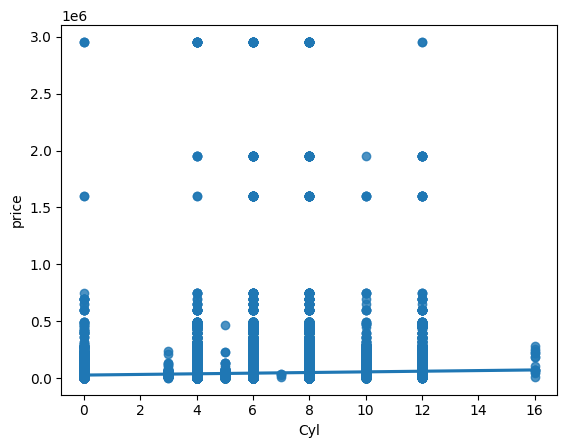

In [174]:
sns.regplot(df, x='Cyl', y='price')
plt.show()

In [32]:
def update_data(df):
    df.loc[(df['brand'] == 'Mercedes-Benz') & (df['engine'] == '2.0 Liter TFSI'), 'hp'] = 225
    
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '300ZX Base'), 'fuel_type'] = 'Gasoline'
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '300ZX Base'), 'hp'] = 300
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '300ZX Base'), 'Cyl'] = 6
    
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'fuel_type'] = 'Gasoline'
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'hp'] = 230
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'Cyl'] = 4
    
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'fuel_type'] = 'Gasoline'
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'hp'] = 155
    df.loc[(df['brand'] == 'Nissan') & (df['model'] == '430 430i'), 'Cyl'] = 4
    
# df['hp'] = df.apply(remaining_hp, axis = 1)
update_data(df)
df.loc[df['is_electric'] == 1, 'Cyl'] = 0

In [33]:
# fill rest values with generic median

df['hp'] = df['hp'].replace(np.nan, df['hp'].median())
df['Cyl'] = df['Cyl'].replace(np.nan, df['Cyl'].median())

df['hp'].isnull().sum(), df['Cyl'].isnull().sum()

(0, 0)

In [34]:
df['Cyl'] = df['Cyl'].round()

Create engine size feature

In [35]:
def extract_size(engine):
    l = re.search(r'(\d\.\d+)\s*L', engine)
    ltr = re.search(r'(\d\.\d+)\s*Liter', engine)
    
    size = l if l else ltr
    
    if size:
        return float(size.group(1))
    else:
        return np.nan

In [36]:
df['engine_size'] = df['engine'].apply(extract_size)

In [37]:
df[df['fuel_type']=='Electric']['engine_size'].isnull().sum()

5688

In [38]:
df.loc[df['is_electric'] == 1, 'engine_size'] = 0

In [116]:
# fill missing engine size with median of brand and model

brand_med = df.groupby(['brand_enc', 'model'])['engine_size'].median()

def fill_brand_med(row):
    
    if pd.isnull(row['engine_size']):
        try:
            return brand_med.loc[(row['brand_enc'], row['model'])]
        except KeyError:
            return row['engine_size']
    else:
        return row['engine_size']
    
df['engine_size'] = df.apply(fill_brand_med, axis=1)

In [125]:
brand_only_med = df.groupby('brand_enc')['engine_size'].median()
def fill_brand_only(row):
    if pd.isnull(row['engine_size']):
        try:
            return brand_only_med.loc[row['brand_enc']]
        except KeyError:
            return row['engine_size']
    else:
        return row['engine_size']

In [40]:
df['engine_size'].isnull().sum()

1

In [41]:
pd.set_option('display.max_columns', None)

def correct_tesla(data):
    data.loc[data['brand'].str.lower() == 'tesla', 'fuel_type'] = 'Electric'
    data.loc[data['brand'].str.lower() == 'tesla', 'Cyl'] = 0
    data.loc[data['brand'].str.lower() == 'tesla', 'engine_size'] = 0
    return data
        
df = correct_tesla(df)

In [42]:
df['engine_size'].isnull().sum()

0

<h2>Transmission Analysis</h2>

In [43]:
df['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [44]:
df['transmission'].isnull().sum()

0

In [45]:
# create a simplified transmission feature

def clean_trans(transmission):
    if pd.isna(transmission):
        return
    transmission = transmission.lower()
    
    if 'a/t' in transmission or 'automatic' in transmission:
        if 'dual' in transmission or 'shift mode' in transmission or 'auto-shift' in transmission:
            return 'Auto with shift'
        else:
            return 'Auto'
    elif 'm/t' in transmission or 'manual' in transmission:
        return 'Manual'
    elif 'cvt' in transmission:
        return 'CVT'
    elif 'single-speed' in transmission or '1-speed' in transmission:
        return 'Single-speed'
    else:
        return 'other'
    
df['simp_trans'] = df['transmission'].apply(clean_trans)
df['simp_trans'].value_counts()

simp_trans
Auto               148437
other               19852
Manual              16358
CVT                  2005
Auto with shift      1865
Single-speed           16
Name: count, dtype: int64

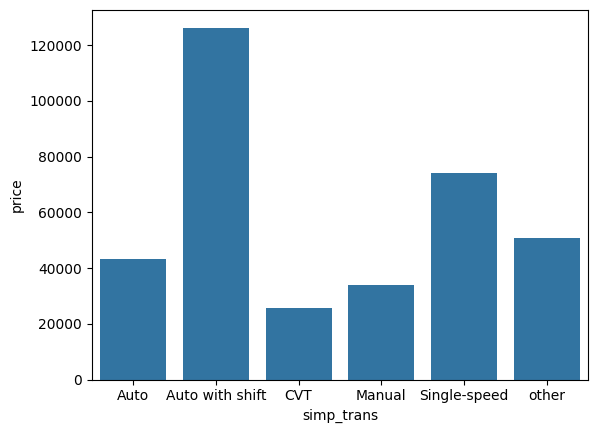

In [175]:
data = df.groupby('simp_trans', as_index=False)['price'].mean()
sns.barplot(data, x = 'simp_trans', y = 'price')
plt.show()

In [156]:
trans_enc = LabelEncoder().fit(df['simp_trans'])
df['simp_trans_enc'] = trans_enc.transform(df['simp_trans'])

In [48]:
# extract number of speeds from transmission

def extract_speed(x):
    if pd.isna(x):
        return None
    x = x.lower()
    
    match = re.search(r'(\d+)-speed', x)
    if match:
        return int(match.group(1))
    else:
        if 'single-speed' in x:
            return 1
        return None
    
df['speeds'] = df['transmission'].apply(extract_speed)

df['speeds'].isnull().sum()

84418

In [120]:
# fill missing values of speeds with median of similar brand and transmission

speed_mode = df.groupby(['brand_enc', 'simp_trans_enc'])['speeds'].median()

def fill_sim_brand_speeds(row):
    if pd.isna(row['speeds']):
        try:
            return speed_mode.loc[(row['brand_enc'], row['simp_trans_enc'])]
        except KeyError:
            return row['speeds']
            
    else:
        return row['speeds']
    
df['speeds'] = df.apply(fill_sim_brand_speeds, axis = 1)
df['speeds'].isnull().sum()

0

In [50]:
df[df['simp_trans_enc'].isin([5, 2])].isnull().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident           220
clean_title        621
price                0
age                  0
brand_enc            0
is_luxury            0
fuel_type_enc        0
is_electric          0
hp                   0
Cyl                  0
engine_size          0
simp_trans           0
simp_trans_enc       0
speeds            7210
dtype: int64

In [51]:
# handle cases where transmission is cvt or other

df.loc[df['transmission'].str.contains('CVT', case=False, na=False), 'speeds'] = 0

# df.loc[df['transmission'].str.contains('other', case=False, na=False), 'speeds'] = -1

def fill_other_with_unknown(row):
    if pd.isnull(row['speeds']):
        if row['simp_trans'] == 'other':
            return -1
    else:
        return row['speeds']
    
df['speeds'] = df.apply(fill_other_with_unknown, axis=1)

In [52]:
df['speeds'].isnull().sum()

0

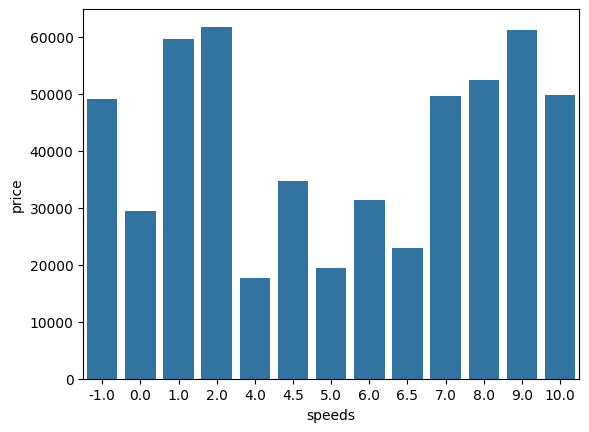

In [176]:
data = df.groupby('speeds', as_index=False)['price'].mean()
sns.barplot(data, x = 'speeds', y='price')
plt.show()

<h2>Exterior color analysis</h2>

In [54]:
df['ext_col'].isnull().sum()

0

In [55]:
df['ext_col'].value_counts().nlargest(20)

ext_col
Black                      48658
White                      43815
Gray                       25293
Silver                     16995
Blue                       14555
Red                         9901
Green                       2698
Gold                        1668
Brown                       1162
Orange                      1139
Beige                       1087
Yellow                       978
Bright White Clearcoat       755
Diamond Black                711
Agate Black Metallic         639
Summit White                 514
Silver Ice Metallic          456
Mythos Black Metallic        417
Midnight Black Metallic      379
–                            366
Name: count, dtype: int64

In [56]:
# simplify color categories

def simp_color_step1(color):
    c = color.lower()
    
    if 'black' in c:
        return 'Black'
    elif 'white' in c:
        return 'White'
    elif 'gray' in c:
        return 'Gray'
    elif 'silver' in c:
        return 'Silver'
    elif 'blue' in c:
        return 'Blue'
    elif 'red' in c:
        return 'Red'
    elif 'green' in c:
        return 'Green'
    elif 'gold' in c:
        return 'Gold'
    elif 'brown' in c:
        return 'Brown'
    elif 'orange' in c:
        return 'Orange'
    elif 'beige' in c:
        return 'Beige'
    elif 'yellow' in c:
        return 'Yellow'
    else:
        return 'other'
    
df['simp_ext_col'] = df['ext_col'].apply(simp_color_step1)


In [57]:
df['simp_ext_col'].value_counts()

simp_ext_col
Black     53917
White     47945
Gray      26669
Silver    18809
Blue      15837
Red       11795
other      4522
Green      2948
Gold       1668
Brown      1185
Orange     1148
Beige      1096
Yellow      994
Name: count, dtype: int64

In [157]:
ext_col_enc = LabelEncoder().fit(df['simp_ext_col'])
df['ext_col_enc'] = ext_col_enc.transform(df['simp_ext_col'])

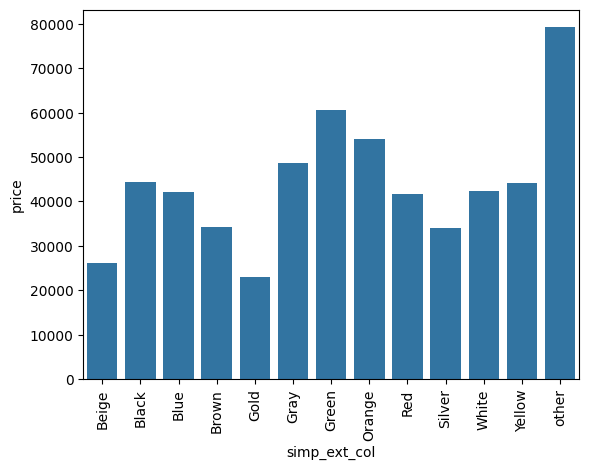

In [177]:
data = df.groupby('simp_ext_col', as_index=False)['price'].mean()
sns.barplot(data, x = 'simp_ext_col', y = 'price')
plt.xticks( rotation=90)
plt.show()

<h2>Interior color analysis</h2>

In [60]:
df['int_col'].isnull().sum()

0

In [61]:
df['int_col'].value_counts()

int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Nougat Brown         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64

In [62]:
df['simp_int_col'] = df['int_col'].apply(simp_color_step1)
df['simp_int_col'].value_counts()

simp_int_col
Black     112677
Beige      24849
Gray       21500
other      10258
Brown       6006
Red         5507
White       4873
Orange       969
Blue         833
Silver       429
Gold         367
Green        214
Yellow        51
Name: count, dtype: int64

In [158]:
int_col_enc = LabelEncoder().fit(df['simp_int_col'])
df['int_col_enc'] = int_col_enc.transform(df['simp_int_col'])

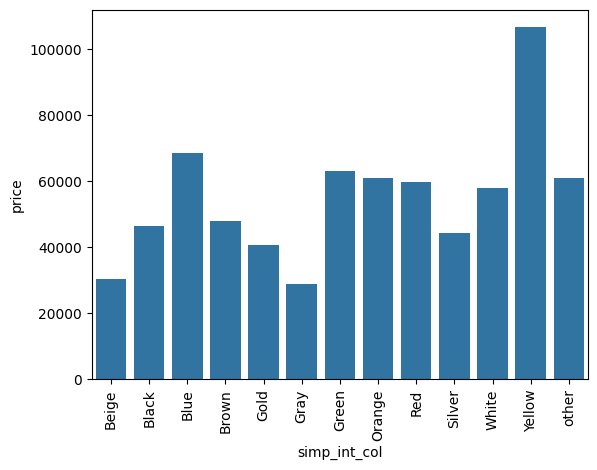

In [178]:
data = df.groupby('simp_int_col', as_index=False)['price'].mean()
sns.barplot(data, x = 'simp_int_col', y = 'price')
plt.xticks(rotation = 90)
plt.show()

<h2>Accident analysis</h2>

In [65]:
df['accident'].isnull().sum()

2452

In [66]:
# fill missing values with most frequent
mf = df['accident'].value_counts().idxmax()

df['accident'] = df['accident'].replace(np.nan, mf)
df['accident'].isnull().sum()

0

In [67]:
# data = df.groupby('accident', as_index=False)['price'].mean()
# sns.barplot(data, x = 'accident', y='price')
# plt.show()

In [68]:
acc_enc = le.fit(df['accident'])

df['acc_enc'] = acc_enc.transform(df['accident'])

<h2>Clean title analysis</h2>

In [69]:
df['clean_title'].isnull().sum()

21419

In [70]:
# fill missing values with No

df['clean_title'] = df['clean_title'].replace(np.nan, 'No')

# crete feature
title_enc = le.fit(df['clean_title'])
df['clean_title_enc'] = title_enc.transform(df['clean_title'])

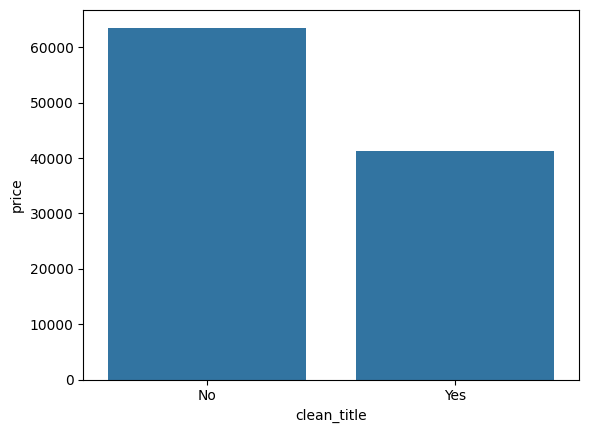

In [179]:
data = df.groupby('clean_title', as_index=False)['price'].mean()
sns.barplot(data, x = 'clean_title', y='price')
plt.show()

In [73]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'age', 'brand_enc', 'is_luxury', 'fuel_type_enc',
       'is_electric', 'hp', 'Cyl', 'engine_size', 'simp_trans',
       'simp_trans_enc', 'speeds', 'simp_ext_col', 'ext_col_enc',
       'simp_int_col', 'int_col_enc', 'acc_enc', 'clean_title_enc'],
      dtype='object')

In [74]:
# df_tf = df[['id', 'model_year', 'milage','age', 'price', 'brand_enc', 'brand_avg', 'is_luxury', 'mod_avg', 'fuel_type_enc', 'is_electric', 'hp', 'Cyl', 'engine_size', 'simp_trans_enc', 'speeds', 'ext_col_enc', 'int_col_enc', 'acc_enc', 'clean_title_enc']]

In [75]:
# df.to_csv('test_features.csv')

In [76]:
# sns.scatterplot(df, x='age', y='price')
# plt.show()

In [80]:
acc = df[['accident', 'acc_enc']].drop_duplicates()
acc_enc = dict(zip(acc['accident'], acc['acc_enc']))

cl = df[['clean_title', 'clean_title_enc']].drop_duplicates()
cl_enc = dict(zip(cl['clean_title'], cl['clean_title_enc']))

In [144]:

def etl(df):
    df['age'] = current_year - df['model_year']
    # brand_enc = le.fit(df['brand'])
    df['brand_enc'] = brand_enc.transform(df['brand'])
    # df['brand_enc'] = df['brand'].map(brand_to_enc)
    df['is_luxury'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    df['fuel_type'] = df.apply(lambda row: fill_fuel_type(row['engine']) if pd.isnull((row['fuel_type'])) or (row['fuel_type'] == '–') else row['fuel_type'], axis=1)
    # fuel_enc = le.fit(df['fuel_type'])
    # df['fuel_type_enc'] = fuel_enc.transform(df['fuel_type'])
    df['fuel_type_enc'] = df['fuel_type'].map(fuel_to_enc)
    df['is_electric'] = df.apply(check_electric, axis=1)
    df['hp'] = df['engine'].apply(extract_hp)
    df['Cyl'] = df['engine'].apply(extract_cyl)
    return df
def etl1(df):
    hp_mod_mean = df.groupby(['brand', 'model'])['hp'].mean()
    hp_brand_mean = df.groupby('brand')['hp'].median()
    cyl_mod_mean = df.groupby(['brand', 'model'])['Cyl'].median()
    cyl_year_mean = df.groupby(['brand', 'model_year'])['Cyl'].median()
    
    df['hp'] = df.apply(fill_rest_hp_model, axis=1)
    df['hp'] = df.apply(fill_rest_hp_brand, axis=1)
    df['Cyl'] = df.apply(fill_rest_cyl_model, axis=1)
    df['Cyl'] = df.apply(fill_rest_cyl_year, axis=1)
    update_data(df)
    return df
def etl12(df):
    df.loc[df['is_electric'] == 1, 'Cyl'] = 0
    df['hp'] = df['hp'].replace(np.nan, df['hp'].median())
    df['Cyl'] = df['Cyl'].replace(np.nan, df['Cyl'].median())
    df['Cyl'] = df['Cyl'].round()
    df['engine_size'] = df['engine'].apply(extract_size)
    df.loc[df['is_electric'] == 1, 'engine_size'] = 0
    df['engine_size'] = df.apply(fill_brand_med, axis=1)
    df['engine_size'] = df.apply(fill_brand_only, axis=1)
    df = correct_tesla(df)
    return df
def etl2(df):
    df['simp_trans'] = df['transmission'].apply(clean_trans)
    # trans_enc = le.fit(df['simp_trans'])
    df['simp_trans_enc'] = trans_enc.transform(df['simp_trans'])
    # df['simp_trans_enc'] = df['simp_trans'].map(trans_enc)
    df['speeds'] = df['transmission'].apply(extract_speed)
    df['speeds'] = df.apply(fill_sim_brand_speeds, axis = 1)
    df.loc[df['transmission'].str.contains('CVT', case=False, na=False), 'speeds'] = 0
    df['speeds'] = df.apply(fill_other_with_unknown, axis=1)
    df['simp_ext_col'] = df['ext_col'].apply(simp_color_step1)
    # ext_col_enc = le.fit(df['simp_ext_col'])
    df['ext_col_enc'] = ext_col_enc.transform(df['simp_ext_col'])
    # df['ext_col_enc'] = df['simp_ext_col'].map(ext_enc)
    df['simp_int_col'] = df['int_col'].apply(simp_color_step1)
    # int_col_enc = le.fit(df['simp_int_col'])
    df['int_col_enc'] = int_col_enc.transform(df['simp_int_col'])
    # df['int_col_enc'] = df['simp_int_col'].map(int_enc)
    df['accident'] = df['accident'].replace(np.nan, mf)
    df['acc_enc'] = df['accident'].map(acc_enc)
    df['clean_title'] = df['clean_title'].replace(np.nan, 'No')
    df['clean_title_enc'] = df['clean_title'].map(cl_enc)
    return df


In [145]:
test_df = pd.read_csv('test.csv')

In [146]:
test_df = etl(test_df)

In [147]:
test_df = etl1(test_df)

In [148]:
test_df = etl12(test_df)

In [159]:
test_df = etl2(test_df)

In [160]:
test_df.isnull().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
age                0
brand_enc          0
is_luxury          0
fuel_type_enc      0
is_electric        0
hp                 0
Cyl                0
engine_size        0
simp_trans         0
simp_trans_enc     0
speeds             0
simp_ext_col       0
ext_col_enc        0
simp_int_col       0
int_col_enc        0
acc_enc            0
clean_title_enc    0
dtype: int64

In [161]:
test_df.to_csv('test_features2.csv')